In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.4 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/ml-research/semantic-image-editing.git
!cd ./semantic-image-editing
!pip install requirements.txt

Cloning into 'semantic-image-editing'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 86 (delta 44), reused 40 (delta 16), pack-reused 0
Receiving objects: 100% (86/86), 24.95 MiB | 31.08 MiB/s, done.
Resolving deltas: 100% (44/44), done.
ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
HINT: You are attempting to install a package literally named "requirements.txt" (which cannot exist). Consider using the '-r' flag to install the packages listed in requirements.txt
ERROR: No matching distribution found for requirements.txt


In [3]:
!pip install requirements.txt

ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
HINT: You are attempting to install a package literally named "requirements.txt" (which cannot exist). Consider using the '-r' flag to install the packages listed in requirements.txt
ERROR: No matching distribution found for requirements.txt


In [4]:
!pip install diffusers
!pip install Pillow<10.0
!pip install accelerate>=0.11.0
!pip install torch>=1.4
!pip install torchvision
!pip install transformers>=4.21.0

/bin/bash: line 1: 10.0: No such file or directory


In [5]:
!pip install semdiffusers

ERROR: Could not find a version that satisfies the requirement semdiffusers (from versions: none)
ERROR: No matching distribution found for semdiffusers


In [6]:
from diffusers import SemanticStableDiffusionPipeline
device = 'cuda'
pipe = SemanticStableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
).to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [7]:
import torch
gen = torch.Generator(device=device)

gen.manual_seed(21)
out = pipe(prompt='a photo of the face of a woman', generator=gen, num_images_per_prompt=1, guidance_scale=7,
           editing_prompt=['smiling, smile',       # Concepts to apply
                           'glasses, wearing glasses',
                           'curls, wavy hair, curly hair',
                           'beard, full beard, mustache'],
           reverse_editing_direction=[False, False, False, False], # Direction of guidance i.e. increase all concepts
           edit_warmup_steps=[10, 10, 10,10], # Warmup period for each concept
           edit_guidance_scale=[4, 5, 5, 5.4], # Guidance scale for each concept
           edit_threshold=[0.99, 0.975, 0.925, 0.96], # Threshold for each concept. Threshold equals the percentile of the latent space that will be discarded. I.e. threshold=0.99 uses 1% of the latent dimensions
           edit_momentum_scale=0.3, # Momentum scale that will be added to the latent guidance
           edit_mom_beta=0.6, # Momentum beta
           edit_weights=[1,1,1,1,1] # Weights of the individual concepts against each other
          )
images = out.images


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

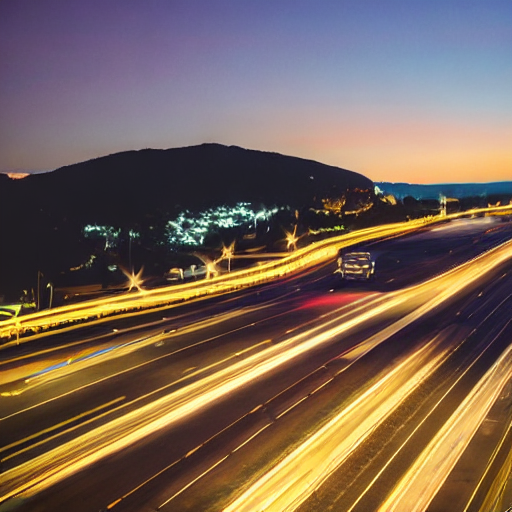

In [8]:
generator = gen.manual_seed(48)
out = pipe(prompt='A highway with dim streetlights', generator=generator, num_images_per_prompt=1, guidance_scale=7)
out.images[0]

In [9]:
gen.manual_seed(48)
out = pipe(prompt='A highway with dim streetlights',
          generator=gen,
          num_images_per_prompt=1,
          guidance_scale=7,
          editing_prompt=[
              # Concepts to apply
              'A red ferrari spotted on hiighway',
              'Red Ferrari'

          ],
          reverse_editing_direction=[False, False, False],
          # Direction of guidance
          edit_warmup_steps=[20, 10, 11],)

  0%|          | 0/51 [00:00<?, ?it/s]

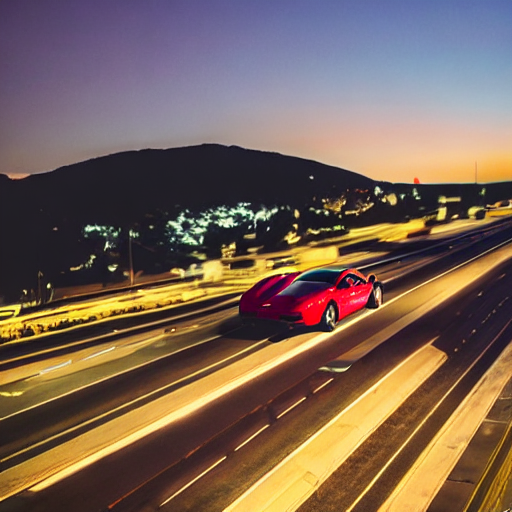

In [10]:
out.images[0]